# <span style="color:black"> Esercitazioni - lezione 12 </span>

## <span style="color:black"> Esercizio 12.1 </span>

Questo esercizio consiste nel valutare l'incidenza della scelta dell'ottimizzatore nell'efficienza di una Deep Neural Network mantenendo tutti fli altri parametri fissati (come nelle celle sottostanti). La rete neurale è stata costruita e allenata per riconoscere una cifra (da 0 a 9) disegnata in un'immagine di 28x28 pixel utilizzando un database di 70000 cifre scritte  mano. Ogni pixel può assumere 256 gradazioni in scala di grigi che rappresentano i colori dal bianco al nero. 
Oltre allo Stochastic Gradient Descent (SGD) sono stati utilizzati Adagrad e Adadelta:
- Adagrad è un ottimizzatore i cui rate di apprendimento sono specificati da parametri, che vengono adattati relativamente a quanto frequentemente un determinato parametro viene aggiornato durante l'allenamento. Più aggiornamenti un parametro riceve, minore diventerà il suo tasso di apprendimento. I valori sono stati mantenuti - come suggerito dalla libreria - uguali a quelli di default.  
- Adadelta è invece un'estensione dell'Adagrad la quale adatta i tassi di apprendimento senza accumulare tutti i passati gradienti, ma basandosi su un intervallo mobile di aggiornamenti del gradiente. In questo modo Adadelta continua ad imparare anche quando vengono effettuati molti aggiornamenti. Anche per questo ottimizzatore sono stati mantenuti i parametri di default.

Le celle seguenti servono per creare la rete neurale con i parametri suggeriti.

In [35]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [36]:


# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


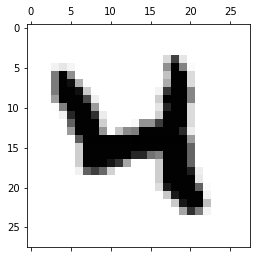

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [37]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [38]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [39]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [55]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 351us/step - loss: 0.2844 - acc: 0.9165 - val_loss: 0.1285 - val_acc: 0.9596
Epoch 2/5
60000/60000 [==============================] - 18s 308us/step - loss: 0.1494 - acc: 0.9582 - val_loss: 0.0977 - val_acc: 0.9674
Epoch 3/5
60000/60000 [==============================] - 20s 337us/step - loss: 0.1169 - acc: 0.9667 - val_loss: 0.0856 - val_acc: 0.9735
Epoch 4/5
60000/60000 [==============================] - 21s 348us/step - loss: 0.0999 - acc: 0.9722 - val_loss: 0.0783 - val_acc: 0.9752
Epoch 5/5
60000/60000 [==============================] - 20s 334us/step - loss: 0.0847 - acc: 0.9759 - val_loss: 0.0717 - val_acc: 0.9771


In [56]:
# evaluate models
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 74us/step


Una volta allenata la rete la si è valutata. Sono riportati nelle immagini seguenti i risultati per la bontà degli ottimizzatori. Come previsto Adadelta sembra essere l'ottimizzatore migliore, si nota però che dopo la terza epoca l'accuratezza dei dati di train supera quella dei dati di test (e l'inverso per il valore della funzione costo) nonostante sia stato mantenuto una probabilità di dropout del 50% : questo potrebbe essere indice di un overfitting. Invece molto buono è l'ottimizzatore Adagrad che arriva fino a quasi al 98% di accuratezza.

<table border="0">
<tr><td> <img src="Adadelta_acc.png"> </td><td> <img src="Adadelta_loss.png"> </td></tr>
</table>

<table border="0">
<tr><td> <img src="Adagrad_acc.png"> </td><td> <img src="Adagrad_loss.png"> </td></tr>
</table>

<table border="0">
<tr><td> <img src="SGD_acc.png"> </td><td> <img src="SGD_loss.png"> </td></tr>
</table>

## <span style="color:black"> Esercizio 12.2 </span>

A questo punto si è cambiata la struttura della Deep Neural Network per tenere conto di proprietà come località e invarianza traslazionale che sono tipiche della matrice di pixel ottenuta da immagini rappresentanti cifre numeriche scritte a mano.  
La cella sottostante serve per formattare i dati in modo che possano essere letti da layer convoluzionali, mentre nelle celle successive la rete viene creata e caricata.  
Si è scelto di utilizzare, a causa dei risultati sopra ottenuti, l'ottimizzatore Adagrad.

In [40]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Sono stati costruiti e allenati diversi modelli di reti neurali convoluzionali, tutti caratterizzati da una simile serie di layer finali: eseguite le varie operazioni di convoluzione e di *pooling* i dati vengono di nuovo "aperti" in un vettore con un layer di `Flatten` seguito da un `Dropout` con probabilità 50%, e successivamente vengono aggiunti un numero variabile di layer di core "standard" di tipo `dense` (con attivazione `relu`), numero scelto in base alle dimensioni della matrice ottenuta dall'elaborazione con i layer di convoluzione. Alla fine viene posto un layer di *output* con attivazione `softmax` composto da 10 neuroni, che rappresentano le 10 possibili cifre riconoscibili dalla rete.
Invece la migliore implementazione trovata per la parte iniziale consiste in:
- layer di convoluzione con 6 filtri di dimensione 5x5 $\rightarrow$ output = 24x24x6
- layer di pooling di dimensione 2x2 $\rightarrow$ output = 12x12x6
- layer di dropout con rate 0.5 
- layer di convoluzione con 16 filtri di dimensione 5x5 $\rightarrow$ output = 8x8x16
- layer di pooling di dimensione 2x2 $\rightarrow$ output = 4x4x16

Si è provato anche ad inserire alcuni layer aggiuntivi di `dropout` per scongiurare casi di overfitting: sebbene l'accuratezza si rivelasse migliore, la rete non era altrettanto efficiente nel riconoscere un nuovo set di immagini inserito appositamente (si veda punto successivo).  
Un'ulteriore elaborazione, successivamente rivelatasi peggiore e quindi scartata, è consistita nella scelta di un maggiore numero di filtri iniziali e del secondo layer di convoluzione; tuttavia la buona efficienza di una rete di questo tipo sarebbe subordinata a tempi diversi di allenamento, che sono invece stati trascurati favorendo reti neurali a "veloce" apprendimento (dell'ordine di qualche minuto).

In [61]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 6 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same',
                     activation='relu',
                     input_shape=input_shape))
    # add first pooling layer
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add second convolutional layer with 16 filters (dimensionality of output space)
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
    # add second pooling layer
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
    # flatten layer
    model.add(Flatten())
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # dense layer 
    model.add(Dense(256, activation='relu'))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adagrad',
                  metrics=['accuracy'])
    return model

N.B. Decommentare la porzione di codice in rosso esclusivamente se si vuole allenare di nuovo la rete creata la cella soprastante, altrimenti si vedano i risultati ottenuti riportati poco sotto.

In [123]:

# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

'''
# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)
'''

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 0.09566874426230788
Test accuracy: 0.9687


In [64]:
save_model_path='CNN_3.model'
#model_CNN.save(filepath=save_model_path, include_optimizer=True)

Nell'immagine seguente è mostrata l'accuratezza del modello. Come atteso i dati di test presentano un'accuratezza migliore di quelli di allenamento e un valore della funzione costo minore. Infatti il dropout viene automaticamente eliminato una volta effettuato l'allenamento della rete, di conseguenza i dati di test risultano più accurati, raggiungendo una precisione del 98% circa.

<table border="0">
<tr><td> <img src="CNN_acc.png"> </td><td> <img src="CNN_loss.png"> </td></tr>
</table>

## <span style="color:black"> Esercizio 12.3 </span>

Giunti a questo punto si è deciso di testare la rete neurale così creata e allenata con un nuovo set di immagini, create dal sottoscritto e disegnate "a mano" su una tela di 28x28 pixel. Le immagini si presentano come segue:

Image size: 28x28


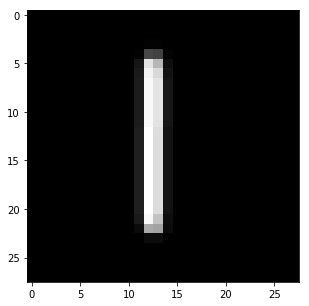

(28, 28)


In [126]:
from PIL import Image
import os

model_CNN=tf.keras.models.load_model('CNN.model')

digit_filename=list()
digit_in=list()

for i in range(10):
    digit_filename.append("./numbers/"+str(i)+".png")
    digit_in.append(Image.open(digit_filename[i]).convert('L'))
    
num=0

ydim, xdim = digit_in[num+1].size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in[num+1].load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

Una volta caricate le immagini (sono state create le 10 cifre da 0 a 9) è necessario formattare i dati in modo che possano essere dati in input alla rete, e quindi è possibile utilizzare la stessa per effettuare il riconoscimento:

(28, 28)


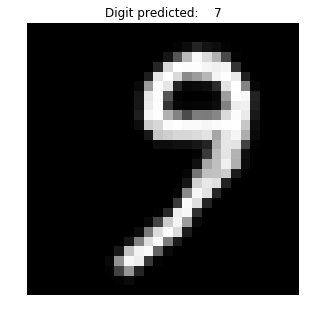

In [129]:
print(data.shape)
#data = data.reshape(1,xdim*ydim)

if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(1, 1, img_rows, img_cols)
    data = data.reshape(1, 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(1, img_rows, img_cols, 1)
    data = data.reshape(1, img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#print(data.shape)
pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

E' stata effettuata questa operazione su tutte le cifre con i risultati illustrati nella cella sottostante. Si nota che quasi tutte le cifre (alcune scritte volutamente male) vengono riconosciute eccetto una. In generale si è verificato, provando con diversi input, che questa sruttura di rete neurale fatica a riconoscere la cifra '9', a differenza delle altre reti testate che facilitavano il riconoscimento di questa cifra a discapito di altre - in generale le più problematiche si sono rivelate essere 7 e 8.  
Ad ogni mmodo, per un allenamento di pochi minuti (con conseguente basso numero di layer e di filtri) si è raggiunto un risultato altamente soddisfacente, in grado di riconoscere cifre anche parecchio differenti dallo "standard".

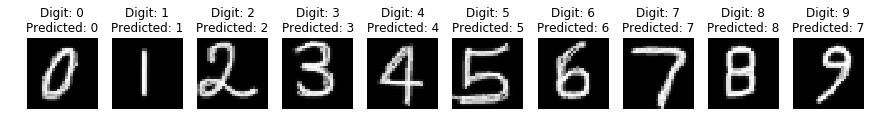

In [128]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
#predictions = model_CNN.predict(X_test)

data = data.reshape(xdim, ydim)

plt.figure(figsize=(15, 15)) 
for k in range(10):    

    ydim, xdim = digit_in[k].size
    pix=digit_in[k].load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(1, 1, img_rows, img_cols)
        data = data.reshape(1, 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(1, img_rows, img_cols, 1)
        data = data.reshape(1, img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)
    
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(data, cmap='gray')  
    plt.title("Digit: {}\nPredicted: {}".format(k, np.argmax(pred_0)))    
    plt.axis('off') 
plt.show()